In [1]:
import pandas as pd
import numpy as np

**Pandas Series (1D Data)**

In [2]:
data = [10, 20, 30, 40]
index_labels = ['a', 'b', 'c', 'd']
series = pd.Series(data, index=index_labels)  # allows access data using labels instead of index positions.
print(series)

a    10
b    20
c    30
d    40
dtype: int64


**Pandas DataFrame (2D Table)**

In [11]:
data = {
    "Name": ["Alice", "Bob", "John"],
    "Age": [23, 26, 30],
    "Salary": [50000, 60000, 70000]
}

df = pd.DataFrame(data)
print(df)

    Name  Age  Salary
0  Alice   23   50000
1    Bob   26   60000
2   John   30   70000


**Read CSV File in Pandas**

In [15]:
df = pd.read_csv("netflix_titles.csv")
print(df.head())   # Show first 5 rows

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [16]:
print(df.info())       # Summary of columns, non-null values, and types
print(df.describe())   # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


**Data Cleaning and Preprocessing**

Handling Missing Values

In [18]:
print(df.isnull().sum())    # Check missing values in each column
df = df.dropna()           # Remove rows with missing values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Renaming Columns

In [20]:
df.rename(columns={'title': 'Movie_Title'}, inplace=True)
print(df.columns)    # Check updated column names

Index(['show_id', 'type', 'Movie_Title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')


Filtering Data

In [21]:
new_df = df[df['release_year'] > 2015]   # Find all movies released after 2015
print(new_df.head())

   show_id     type                    Movie_Title             director  \
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
38     s39    Movie            Birth of the Dragon         George Nolfi   
73     s74    Movie                   King of Boys         Kemi Adetiba   

                                                 cast  \
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
38  Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...   
73  Sola Sobowale, Adesua Etomi, Remilekun "Remini...   

                         country          date_added  release_year rating  \
8                 United Kingdom  September 24, 2021          2021  TV-14   
9                  United States  September 24, 2021

**Data Manipulation**

Sorting Values

In [23]:
df = df.sort_values(by='release_year', ascending=False)  # Sort movies by release year
print(df.head())

     show_id   type                                        Movie_Title  \
1184   s1185  Movie                                The Yin Yang Master   
1220   s1221  Movie                                   Coven of Sisters   
1198   s1199  Movie               RebellComedy: Straight Outta the Zoo   
1195   s1196  Movie  Operation Varsity Blues: The College Admission...   
1150   s1151  Movie                    7 Yards: The Chris Norton Story   

              director                                               cast  \
1184         Li Weiran  Chen Kun, Zhou Xun, Qu Chuxiao, Shen Yue, Will...   
1220      Pablo Agüero  Alex Brendemühl, Amaia Aberasturi, Daniel Fane...   
1198  Ladislaus Kiraly  Khalid Bounouar, Alain Frei, Babak Ghassim, Be...   
1195       Chris Smith                                     Matthew Modine   
1150     Jonathon Link                                       Chris Norton   

               country      date_added  release_year rating duration  \
1184             Chi

**Grouping Data**

In [25]:
# Count movies per country
print(df.groupby('country')['Movie_Title'].count().sort_values(ascending=False))

country
United States                           1846
India                                    875
United Kingdom                           183
Canada                                   107
Spain                                     91
                                        ... 
Indonesia, United Kingdom                  1
Indonesia, South Korea, Singapore          1
Indonesia, Netherlands                     1
India, United Kingdom, France, Qatar       1
Zimbabwe                                   1
Name: Movie_Title, Length: 604, dtype: int64


**Data Visualization**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

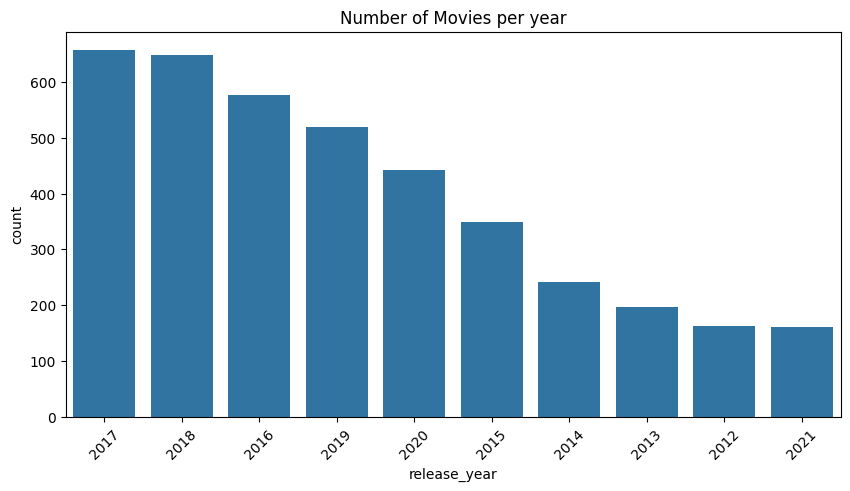

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Number of Movies per year')
plt.show()